<a href="https://colab.research.google.com/github/JhonnnyTzy/poblacion/blob/main/poblacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valor interpolado para el año 2024 utilizando el método de Newton: 11445410


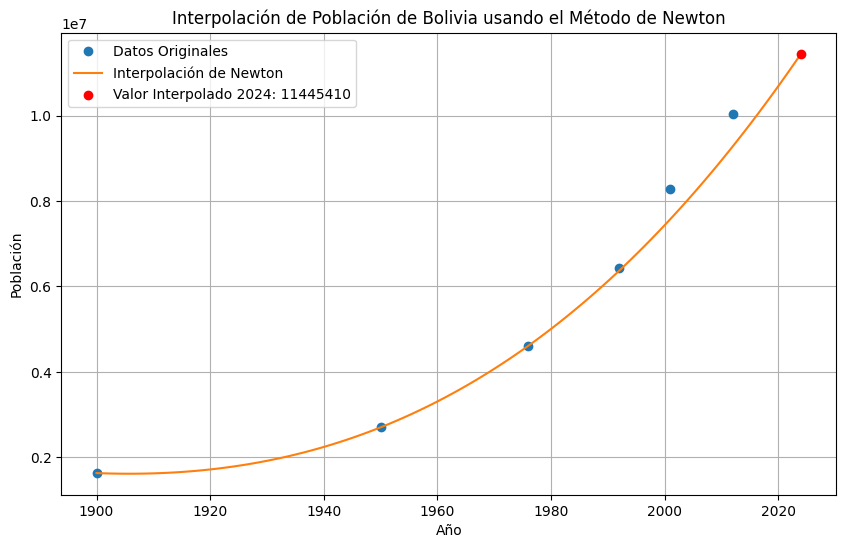

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular las diferencias divididas de Newton
def diferencias_divididas(x, y):
    n = len(x)
    coef = np.copy(y)

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x[i] - x[i-j])

    return coef

# Función para evaluar el polinomio de Newton
def newton_interpol(x, coef, valor):
    n = len(coef)
    result = coef[-1]

    for i in range(n-2, -1, -1):
        result = result * (valor - x[i]) + coef[i]

    return result

# Datos proporcionados
x = np.array([1900, 1950, 1976, 1992, 2001, 2012])
y = np.array([1633910, 2704165, 4613486, 6420792, 8274325, 10027254])

# Calculamos los coeficientes usando diferencias divididas
coeficientes = diferencias_divididas(x, y)

# Año a interpolar
valor_a_interpolar = 2024

# Calculamos el valor interpolado utilizando el polinomio de Newton
newton_result = newton_interpol(x, coeficientes, valor_a_interpolar)

# Imprimir el resultado
print(f"Valor interpolado para el año {valor_a_interpolar} utilizando el método de Newton: {int(newton_result)}")

# Graficar los datos originales y el resultado de la interpolación
x_new = np.linspace(min(x), valor_a_interpolar, 100)
y_new = [newton_interpol(x, coeficientes, i) for i in x_new]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos Originales')
plt.plot(x_new, y_new, label='Interpolación de Newton')
plt.scatter([valor_a_interpolar], [newton_result], color='red', zorder=5, label=f'Valor Interpolado {valor_a_interpolar}: {int(newton_result)}')

# Personalización del gráfico
plt.title('Interpolación de Población de Bolivia usando el Método de Newton')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.grid(True)
plt.show()
